# Universality theorem - visualization

In [4]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

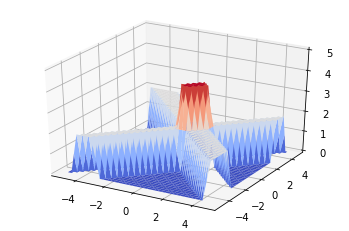

In [5]:
def output(x, y):
    n1 = sigmoid(100*x + 100*y + 50)
    n2 = sigmoid(100*x + 100*y - 200)
    n3 = sigmoid(100*x - 100*y - 50)
    n4 = sigmoid(100*x - 100*y - 200)
    return 2*n1 - 2*n2 + 2*n3 - 2*n4

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = output(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_zlim(0.0, 5.)
plt.show()